In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [162]:
df_2015 = pd.read_csv('2015.csv')
df_2016 = pd.read_csv('2016.csv')
df_2017 = pd.read_csv('2017.csv')
df_2018 = pd.read_csv('2018.csv')
df_2019 = pd.read_csv('2019.csv')
df_2020 = pd.read_csv('2020.csv')

In [163]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [164]:
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [165]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [166]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [167]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [168]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

In [169]:
#  observations:
#  1. the data fields in each dataset varies
#  2. there is no null values within the variables
#  Since the data fields vary, we need to standardize the data before we can combine the datasets

In [170]:
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [171]:
df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [172]:
df_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [173]:
df_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [174]:
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [175]:
df_2020.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [176]:
# Observations from the first 5 observations of each dataset
# 1. 2015 and 2016: "Country" and "Region" are available
#    2017, 2018 and 2019: Only "Country or Region" is available, Region information is not available.
#    2020: "Country Name" and "Regional Indicator" are available.
#    Standardization required: 
#    i. Rename "Country or Region" to "Country" for 2017, 2018 and 2019 and create the column "Region"
#    ii. Rename "Country Name" and "Regional Indicator" to "Country" and "Region" respectively for 2020
# 2. 2015, 2016: "Happiness Rank" and "Happiness Score" are available
#    2017: "Happiness.Rank" and "Happiness.Score" are available
#    2018, 2019: "Overall rank" and "Score" are available
#    2020: Only "Ladder score" is available
#    Standardization required: 
#    i. Rename "Happiness.Rank" and "Happiness.Score" to "Happiness Rank" and "Happiness Score" respectively for 2017
#    ii. Rename "Overall rank" and "Score" to "Happiness Rank" and "Happiness Score" respectively for 2018 and 2019
#    iii. Rename "Ladder score" to "Happiness Score" and Create a column "Happiness Rank" for 2020
# 3. 2015: "Standard Error"
#    2020: "Standard error of ladder score"
#    2016: "Lower Confidence Interval" and "Upper Confidence Interval"
#    2017: "Whisker.high" and "Whisker.low"
#    2020: "upperwhisker" and "Lowerwhisker"
#    Standardization required: 
#    We will drop these variables, because the variable may only be available in one or two datasets only
# 4. For 2015-2019, the rest of the variables are the components of the happiness score
#    For 2020, there are a lot more variables are available, we will look into in a bit
#    Standardization required for 2015-2019
#    "Economy (GDP per Capita)", "Economy..GDP.per.Capita.", "GDP per capita" -> "GDP per capita"
#    "Family" is available in from 2015 to 2017 only -> Create a blank column "Family" for 2018 and 2019
#    "Social support" is available in from 2018 to 2019 only -> Create a blank column "Social support" for 2015 and 2017
#    "Health (Life Expectancy)", "Health..Life.Expectancy.", "Healthy life expectancy" -> "Healthy life expectancy"
#    "Freedom","Freedom to make life choices" -> "Freedom to make life choices"
#    "Trust (Government Corruption)","Trust..Government.Corruption.", "Perceptions of corruption" - > "Perceptions of corruption"
#    "Dystopia Residual" is available in from 2015 to 2017 only -> Create a blank column "Dystopia Residual" for 2018 and 2019
# 5. For 2020 dataset, for example, there are 2 variables, "Social support" and "Explained by: Social support"
#    Actions required:
#    - We need to determine which variable is used to calculate the happiness score
#    - standardize the naming

In [177]:
clean_df_2015 = df_2015.rename(columns = {'Economy (GDP per Capita)': 'GDP per capita', 'Health (Life Expectancy)': 'Healthy life expectancy', 'Trust (Government Corruption)': 'Perceptions of corruption'}, inplace = False)
clean_df_2015 = clean_df_2015.drop(columns=['Standard Error'])
clean_df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Family,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [178]:
clean_df_2016 = df_2016.rename(columns = {'Economy (GDP per Capita)': 'GDP per capita', 'Health (Life Expectancy)': 'Healthy life expectancy', 'Trust (Government Corruption)': 'Perceptions of corruption'}, inplace = False)
clean_df_2016 = clean_df_2016.drop(columns=['Lower Confidence Interval','Upper Confidence Interval'])
clean_df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Family,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [179]:
clean_df_2017 = df_2017.rename(columns = {'Happiness.Rank': 'Happiness Rank', 'Happiness.Score': 'Happiness Score', 'Economy..GDP.per.Capita.': 'GDP per capita', 'Health..Life.Expectancy.': 'Healthy life expectancy','Trust..Government.Corruption.': 'Perceptions of corruption','Dystopia.Residual': 'Dystopia Residual'}, inplace = False)
clean_df_2017 = clean_df_2017.drop(columns=['Whisker.high','Whisker.low'])
clean_df_2017.head()

,Country,Happiness Rank,Happiness Score,GDP per capita,Family,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption,Dystopia Residual
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [180]:
clean_df_2018 = df_2018.rename(columns = {'Country or region': 'Country', 'Overall rank': 'Happiness Rank','Score': 'Happiness Score', 'Economy..GDP.per.Capita.': 'GDP per capita', 'Health..Life.Expectancy.': 'Healthy life expectancy','Freedom to make life choices': 'Freedom','Trust..Government.Corruption.': 'Perceptions of corruption','Dystopia.Residual': 'Dystopia Residual'}, inplace = False)
cols_18 = clean_df_2018.columns.tolist()
cols_18.insert(0, cols_18.pop(cols_18.index('Country')))
clean_df_2018 = clean_df_2018.reindex(columns= cols_18)
clean_df_2018.head()

,Country,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption
0,Finland,1,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,Norway,2,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,Denmark,3,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,Iceland,4,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,Switzerland,5,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [181]:
clean_df_2019 = df_2019.rename(columns = {'Country or region': 'Country', 'Overall rank': 'Happiness Rank','Score': 'Happiness Score', 'Economy..GDP.per.Capita.': 'GDP per capita', 'Health..Life.Expectancy.': 'Healthy life expectancy','Freedom to make life choices': 'Freedom','Trust..Government.Corruption.': 'Perceptions of corruption','Dystopia.Residual': 'Dystopia Residual'}, inplace = False)
cols_19 = clean_df_2019.columns.tolist()
cols_19.insert(0, cols_19.pop(cols_19.index('Country')))
clean_df_2019 = clean_df_2019.reindex(columns= cols_19)
clean_df_2019.head()

,Country,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption
0,Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [182]:
# Check whick variables are the components of the Happiness Score in 2020 dataset
df_2020.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [183]:
col_list = df_2020.columns.tolist()
col_list

['Country name',
 'Regional indicator',
 'Ladder score',
 'Standard error of ladder score',
 'upperwhisker',
 'lowerwhisker',
 'Logged GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Ladder score in Dystopia',
 'Explained by: Log GDP per capita',
 'Explained by: Social support',
 'Explained by: Healthy life expectancy',
 'Explained by: Freedom to make life choices',
 'Explained by: Generosity',
 'Explained by: Perceptions of corruption',
 'Dystopia + residual']

In [184]:
col_list_1 = col_list[6:13]
col_list_2 = col_list[13:20]
print(col_list_1)
print(col_list_2)

['Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Ladder score in Dystopia']
['Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption', 'Dystopia + residual']


In [185]:
df_2020["sum_1"] = round(df_2020[col_list_1].sum(axis=1),4)
df_2020["sum_2"] = round(df_2020[col_list_2].sum(axis=1),4)
df_2020

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,sum_1,sum_2
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,...,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,86.5519,7.8087
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,...,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,87.2909,7.6456
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,...,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,89.3285,7.5599
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,...,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,88.6271,7.5045
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,...,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,88.5669,7.4880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,...,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198,55.7320,3.4759
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,...,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445,72.3517,3.3123
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,...,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031,67.6680,3.2992
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,...,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751,62.1826,2.8166


In [186]:
df_2020['check_1'] = round(df_2020['Ladder score'],4)-(round(df_2020['sum_1'],4))
df_2020['check_2'] = round(df_2020['Ladder score'],4)-(round(df_2020['sum_2'],4))
df_2020

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,sum_1,sum_2,check_1,check_2
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,...,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,86.5519,7.8087,-78.7432,0.0
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,...,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,87.2909,7.6456,-79.6453,0.0
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,...,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,89.3285,7.5599,-81.7686,0.0
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,...,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,88.6271,7.5045,-81.1226,0.0
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,...,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,88.5669,7.4880,-81.0789,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,...,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198,55.7320,3.4759,-52.2561,0.0
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,...,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445,72.3517,3.3123,-69.0394,0.0
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,...,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031,67.6680,3.2992,-64.3688,0.0
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,...,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751,62.1826,2.8166,-59.3660,0.0


In [187]:
np.count_nonzero(df_2020['check_1'] != 0)

153

In [188]:
np.count_nonzero(df_2020['check_2'] != 0)

0

In [189]:
# We can conclude that the below variables are the components of the happiness score
col_list_2

['Explained by: Log GDP per capita',
 'Explained by: Social support',
 'Explained by: Healthy life expectancy',
 'Explained by: Freedom to make life choices',
 'Explained by: Generosity',
 'Explained by: Perceptions of corruption',
 'Dystopia + residual']

In [190]:
clean_df_2020 = df_2020.drop(columns=['Ladder score in Dystopia','Standard error of ladder score','upperwhisker','lowerwhisker','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption','sum_1','sum_2','check_1','check_2'])
clean_df_2020 = clean_df_2020.rename(columns = {'Country name': 'Country', 'Regional indicator': 'Region', 'Ladder score': 'Happiness Score', 'Explained by: Log GDP per capita': 'GDP per capita', 'Explained by: Social support': 'Social support', 'Explained by: Healthy life expectancy': 'Healthy life expectancy','Explained by: Freedom to make life choices': 'Freedom','Explained by: Perceptions of corruption': 'Perceptions of corruption','Explained by: Generosity': 'Generosity','Dystopia + residual': 'Dystopia Residual'}, inplace = False)
clean_df_2020.head()

,Country,Region,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption,Dystopia Residual
0,Finland,Western Europe,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [191]:
clean_df_2020["Happiness Rank"] = clean_df_2020["Happiness Score"].rank(ascending=False)
clean_df_2020

,Country,Region,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption,Dystopia Residual,Happiness Rank
0,Finland,Western Europe,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,1.0
1,Denmark,Western Europe,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,2.0
2,Switzerland,Western Europe,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,3.0
3,Iceland,Western Europe,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,4.0
4,Norway,Western Europe,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,5.0
...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198,149.0
149,Rwanda,Sub-Saharan Africa,3.3123,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445,150.0
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031,151.0
151,South Sudan,Sub-Saharan Africa,2.8166,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751,152.0


In [192]:
cols_20 = clean_df_2020.columns.tolist()
cols_20.insert(2, cols_20.pop(cols_20.index('Happiness Rank')))
clean_df_2020 = clean_df_2020.reindex(columns= cols_20)
clean_df_2020.head()

,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption,Dystopia Residual
0,Finland,Western Europe,1.0,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,2.0,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,3.0,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,4.0,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,5.0,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [193]:
# Standardize the Country and Region across the 6 years dataframe
# 1. Using the region information in 2020 Dataframe as reference
# 2. Create a colum "Region" to 2019, 2018 and 2017 dataframes
# 3. Update "Region" column for 2015 and 2016
# 4. Standardize the Country names and Region names
# 5. For 2019, 2018 & 2017, if the region information is still missing, region information in 2016 dataframe will be used as reference

In [194]:
Country_2020 = clean_df_2020[['Country','Region']]
Country_2020

,Country,Region
0,Finland,Western Europe
1,Denmark,Western Europe
2,Switzerland,Western Europe
3,Iceland,Western Europe
4,Norway,Western Europe
...,...,...
148,Central African Republic,Sub-Saharan Africa
149,Rwanda,Sub-Saharan Africa
150,Zimbabwe,Sub-Saharan Africa
151,South Sudan,Sub-Saharan Africa


In [195]:
clean_df_2019 = clean_df_2019.merge(Country_2020,on='Country',how="left")
cols_19 = clean_df_2019.columns.tolist()
cols_19.insert(1, cols_19.pop(cols_19.index('Region')))
clean_df_2019 = clean_df_2019.reindex(columns= cols_19)
clean_df_2019

,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption
0,Finland,Western Europe,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,Western Europe,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,Western Europe,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,Western Europe,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,Western Europe,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,Sub-Saharan Africa,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,Tanzania,Sub-Saharan Africa,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,Afghanistan,South Asia,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,Central African Republic,Sub-Saharan Africa,155,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [196]:
clean_df_2018 = clean_df_2018.merge(Country_2020,on='Country',how="left")
cols_18 = clean_df_2018.columns.tolist()
cols_18.insert(1, cols_18.pop(cols_18.index('Region')))
clean_df_2018 = clean_df_2018.reindex(columns= cols_18)
clean_df_2018

,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption
0,Finland,Western Europe,1,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,Norway,Western Europe,2,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,Denmark,Western Europe,3,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,Iceland,Western Europe,4,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,Switzerland,Western Europe,5,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...,...
151,Yemen,Middle East and North Africa,152,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,Tanzania,Sub-Saharan Africa,153,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,South Sudan,Sub-Saharan Africa,154,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,Central African Republic,Sub-Saharan Africa,155,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [197]:
clean_df_2017 = clean_df_2017.merge(Country_2020,on='Country',how="left")
cols_17 = clean_df_2017.columns.tolist()
cols_17.insert(1, cols_17.pop(cols_17.index('Region')))
clean_df_2017 = clean_df_2017.reindex(columns= cols_17)
clean_df_2017

,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Family,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption,Dystopia Residual
0,Norway,Western Europe,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,Western Europe,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,Western Europe,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,Western Europe,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,Western Europe,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,Sub-Saharan Africa,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,NaN,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,Sub-Saharan Africa,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,Sub-Saharan Africa,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [198]:
clean_df_2016 = clean_df_2016.merge(Country_2020,on='Country',how="left")
clean_df_2016['Region_y'] = clean_df_2016['Region_y'].fillna(clean_df_2016['Region_x'])
clean_df_2016.drop(['Region_x'],inplace=True,axis=1)
clean_df_2016.rename(columns={'Region_y':'Region'},inplace=True)
cols_16 = clean_df_2016.columns.tolist()
cols_16.insert(1, cols_16.pop(cols_16.index('Region')))
clean_df_2016 = clean_df_2016.reindex(columns= cols_16)
clean_df_2016

,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Family,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,South Asia,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [199]:
clean_df_2015 = clean_df_2015.merge(Country_2020,on='Country',how="left")
clean_df_2015['Region_y'] = clean_df_2015['Region_y'].fillna(clean_df_2015['Region_x'])
clean_df_2015.drop(['Region_x'],inplace=True,axis=1)
clean_df_2015.rename(columns={'Region_y':'Region'},inplace=True)
cols_15 = clean_df_2015.columns.tolist()
cols_15.insert(1, cols_15.pop(cols_15.index('Region')))
clean_df_2015 = clean_df_2015.reindex(columns= cols_15)
clean_df_2015

,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Family,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America and ANZ,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [200]:
clean_df_2020.Region.unique()

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

In [201]:
clean_df_2015['Region'].isnull().sum()
clean_df_2015.Region.unique()

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Middle East and Northern Africa', 'Southeast Asia',
       'Central and Eastern Europe', 'Eastern Asia',
       'Commonwealth of Independent States', 'East Asia',
       'Sub-Saharan Africa', 'Southern Asia', 'South Asia'], dtype=object)

In [202]:
clean_df_2015.Region.replace(['Middle East and Northern Africa', 'Eastern Asia', 'Southern Asia'], ['Middle East and North Africa', 'East Asia', 'South Asia'], inplace=True)
clean_df_2015.Region.unique()

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Southeast Asia', 'Central and Eastern Europe', 'East Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

In [203]:
clean_df_2016['Region'].isnull().sum()
clean_df_2016.Region.unique()

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Southeast Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Middle East and Northern Africa',
       'Commonwealth of Independent States', 'East Asia',
       'Sub-Saharan Africa', 'Southern Asia', 'South Asia'], dtype=object)

In [204]:
clean_df_2016.Region.replace(['Middle East and Northern Africa', 'Eastern Asia', 'Southern Asia'], ['Middle East and North Africa', 'East Asia', 'South Asia'], inplace=True)
clean_df_2016.Region.unique()

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Southeast Asia', 'Central and Eastern Europe', 'East Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

In [205]:
clean_df_2017['Region'].isnull().sum()

8

In [206]:
clean_df_2017[clean_df_2017.isna().Region]

,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Family,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption,Dystopia Residual
34,Qatar,NaN,35,6.375,1.870766,1.274297,0.710098,0.604131,0.330474,0.439299,1.145464
49,Belize,NaN,50,5.956,0.907975,1.081418,0.450192,0.547509,0.240016,0.096581,2.631956
70,"Hong Kong S.A.R., China",NaN,71,5.472,1.551675,1.262791,0.943062,0.490969,0.374466,0.293934,0.554633
92,Somalia,NaN,93,5.151,0.022643,0.721151,0.113989,0.602127,0.291631,0.282410,3.117485
96,Bhutan,NaN,97,5.011,0.885416,1.340127,0.495879,0.501538,0.474055,0.173380,1.140184
129,Sudan,NaN,130,4.139,0.659517,1.214009,0.290921,0.014996,0.182317,0.089848,1.687066
139,Angola,NaN,140,3.795,0.858428,1.104412,0.049869,0.000000,0.097926,0.069720,1.614482
151,Syria,NaN,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574


In [207]:
clean_df_2017.Country.replace(['Hong Kong S.A.R., China'], ['Hong Kong'], inplace=True)

In [208]:
Country_2016 = clean_df_2016[['Country','Region']]
clean_df_2017 = clean_df_2017.merge(Country_2016,on='Country',how="left")
clean_df_2017['Region_x'] = clean_df_2017['Region_x'].fillna(clean_df_2017['Region_y'])
clean_df_2017.drop(['Region_y'],inplace=True,axis=1)
clean_df_2017.rename(columns={'Region_x':'Region'},inplace=True)
cols_17 = clean_df_2017.columns.tolist()
cols_17.insert(1, cols_17.pop(cols_17.index('Region')))
clean_df_2017 = clean_df_2017.reindex(columns= cols_17)
clean_df_2017

,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Family,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption,Dystopia Residual
0,Norway,Western Europe,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,Western Europe,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,Western Europe,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,Western Europe,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,Western Europe,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,Sub-Saharan Africa,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,Middle East and North Africa,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,Sub-Saharan Africa,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,Sub-Saharan Africa,154,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


In [209]:
clean_df_2017['Region'].isnull().sum()

0

In [210]:
clean_df_2017.Region.unique()

array(['Western Europe', 'North America and ANZ',
       'Middle East and North Africa', 'Latin America and Caribbean',
       'Central and Eastern Europe', 'Southeast Asia', 'East Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

In [211]:
clean_df_2018['Region'].isnull().sum()

11

In [212]:
clean_df_2018[clean_df_2018.isna().Region]

,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption
25,Taiwan,NaN,26,6.441,1.365,1.436,0.857,0.418,0.151,0.078
31,Qatar,NaN,32,6.374,1.649,1.303,0.748,0.654,0.256,0.171
37,Trinidad & Tobago,NaN,38,6.192,1.223,1.492,0.564,0.575,0.171,0.019
48,Belize,NaN,49,5.956,0.807,1.101,0.474,0.593,0.183,0.089
57,Northern Cyprus,NaN,58,5.835,1.229,1.211,0.909,0.495,0.179,0.154
75,Hong Kong,NaN,76,5.430,1.405,1.290,1.030,0.524,0.246,0.291
96,Bhutan,NaN,97,5.082,0.796,1.335,0.527,0.541,0.364,0.171
97,Somalia,NaN,98,4.982,0.000,0.712,0.115,0.674,0.238,0.282
136,Sudan,NaN,137,4.139,0.605,1.240,0.312,0.016,0.134,0.082
141,Angola,NaN,142,3.795,0.730,1.125,0.269,0.000,0.079,0.061


In [213]:
clean_df_2018 = clean_df_2018.merge(Country_2016,on='Country',how="left")
clean_df_2018['Region_x'] = clean_df_2018['Region_x'].fillna(clean_df_2018['Region_y'])
clean_df_2018.drop(['Region_y'],inplace=True,axis=1)
clean_df_2018.rename(columns={'Region_x':'Region'},inplace=True)
cols_18 = clean_df_2018.columns.tolist()
cols_18.insert(1, cols_18.pop(cols_18.index('Region')))
clean_df_2018 = clean_df_2018.reindex(columns= cols_18)
clean_df_2018

,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption
0,Finland,Western Europe,1,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,Norway,Western Europe,2,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,Denmark,Western Europe,3,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,Iceland,Western Europe,4,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,Switzerland,Western Europe,5,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...,...
151,Yemen,Middle East and North Africa,152,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,Tanzania,Sub-Saharan Africa,153,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,South Sudan,Sub-Saharan Africa,154,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,Central African Republic,Sub-Saharan Africa,155,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [214]:
clean_df_2018['Region'].isnull().sum()

2

In [215]:
clean_df_2018[clean_df_2018.isna().Region]

,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption
37,Trinidad & Tobago,NaN,38,6.192,1.223,1.492,0.564,0.575,0.171,0.019
57,Northern Cyprus,NaN,58,5.835,1.229,1.211,0.909,0.495,0.179,0.154


In [216]:
import difflib
difflib.get_close_matches('Trinidad & Tobago', clean_df_2015['Country'])

['Trinidad and Tobago']

In [217]:
difflib.get_close_matches('Northern Cyprus', clean_df_2015['Country'])

['North Cyprus']

In [218]:
clean_df_2018.Country.replace(['Trinidad & Tobago', 'Northern Cyprus'], ['Trinidad and Tobago', 'North Cyprus'], inplace=True)

In [219]:
clean_df_2018 = clean_df_2018.merge(Country_2016,on='Country',how="left")
clean_df_2018['Region_x'] = clean_df_2018['Region_x'].fillna(clean_df_2018['Region_y'])
clean_df_2018.drop(['Region_y'],inplace=True,axis=1)
clean_df_2018.rename(columns={'Region_x':'Region'},inplace=True)
cols_18 = clean_df_2018.columns.tolist()
cols_18.insert(1, cols_18.pop(cols_18.index('Region')))
clean_df_2018 = clean_df_2018.reindex(columns= cols_18)
clean_df_2018

,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption
0,Finland,Western Europe,1,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,Norway,Western Europe,2,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,Denmark,Western Europe,3,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,Iceland,Western Europe,4,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,Switzerland,Western Europe,5,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...,...
151,Yemen,Middle East and North Africa,152,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,Tanzania,Sub-Saharan Africa,153,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,South Sudan,Sub-Saharan Africa,154,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,Central African Republic,Sub-Saharan Africa,155,3.083,0.024,0.000,0.010,0.305,0.218,0.038


In [220]:
clean_df_2018['Region'].isnull().sum()

0

In [221]:
clean_df_2018.Region.unique()

array(['Western Europe', 'North America and ANZ',
       'Latin America and Caribbean', 'Middle East and North Africa',
       'Central and Eastern Europe', 'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

In [222]:
clean_df_2019['Region'].isnull().sum()

9

In [223]:
clean_df_2019[clean_df_2019.isna().Region]

,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption
24,Taiwan,NaN,25,6.446,1.368,1.430,0.914,0.351,0.242,0.097
28,Qatar,NaN,29,6.374,1.684,1.313,0.871,0.555,0.220,0.167
38,Trinidad & Tobago,NaN,39,6.192,1.231,1.477,0.713,0.489,0.185,0.016
63,Northern Cyprus,NaN,64,5.718,1.263,1.252,1.042,0.417,0.191,0.162
75,Hong Kong,NaN,76,5.430,1.438,1.277,1.122,0.440,0.258,0.287
83,North Macedonia,NaN,84,5.274,0.983,1.294,0.838,0.345,0.185,0.034
94,Bhutan,NaN,95,5.082,0.813,1.321,0.604,0.457,0.370,0.167
111,Somalia,NaN,112,4.668,0.000,0.698,0.268,0.559,0.243,0.270
148,Syria,NaN,149,3.462,0.619,0.378,0.440,0.013,0.331,0.141


In [224]:
clean_df_2019.Country.replace(['Trinidad & Tobago', 'Northern Cyprus'], ['Trinidad and Tobago', 'North Cyprus'], inplace=True)

In [225]:
clean_df_2019 = clean_df_2019.merge(Country_2016,on='Country',how="left")
clean_df_2019['Region_x'] = clean_df_2019['Region_x'].fillna(clean_df_2019['Region_y'])
clean_df_2019.drop(['Region_y'],inplace=True,axis=1)
clean_df_2019.rename(columns={'Region_x':'Region'},inplace=True)
cols_19 = clean_df_2019.columns.tolist()
cols_19.insert(1, cols_19.pop(cols_19.index('Region')))
clean_df_2019 = clean_df_2019.reindex(columns= cols_19)
clean_df_2019

,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption
0,Finland,Western Europe,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,Western Europe,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,Western Europe,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,Western Europe,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,Western Europe,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,Sub-Saharan Africa,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,Tanzania,Sub-Saharan Africa,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,Afghanistan,South Asia,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,Central African Republic,Sub-Saharan Africa,155,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [226]:
clean_df_2019['Region'].isnull().sum()

1

In [227]:
clean_df_2019[clean_df_2019.isna().Region]

,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption
83,North Macedonia,NaN,84,5.274,0.983,1.294,0.838,0.345,0.185,0.034


In [228]:
difflib.get_close_matches('North Macedonia', clean_df_2015['Country'])

['Macedonia']

In [229]:
clean_df_2019.Country.replace(['North Macedonia'], ['Macedonia'], inplace=True)
clean_df_2019 = clean_df_2019.merge(Country_2016,on='Country',how="left")
clean_df_2019['Region_x'] = clean_df_2019['Region_x'].fillna(clean_df_2019['Region_y'])
clean_df_2019.drop(['Region_y'],inplace=True,axis=1)
clean_df_2019.rename(columns={'Region_x':'Region'},inplace=True)
cols_19 = clean_df_2019.columns.tolist()
cols_19.insert(1, cols_19.pop(cols_19.index('Region')))
clean_df_2019 = clean_df_2019.reindex(columns= cols_19)
clean_df_2019

,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption
0,Finland,Western Europe,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,Western Europe,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,Western Europe,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,Western Europe,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,Western Europe,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,Sub-Saharan Africa,152,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,Tanzania,Sub-Saharan Africa,153,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,Afghanistan,South Asia,154,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,Central African Republic,Sub-Saharan Africa,155,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [230]:
clean_df_2019['Region'].isnull().sum()

0

In [231]:
clean_df_2019.Region.unique()

array(['Western Europe', 'North America and ANZ',
       'Latin America and Caribbean', 'Middle East and North Africa',
       'Central and Eastern Europe', 'East Asia', 'Southeast Asia',
       'Commonwealth of Independent States', 'Sub-Saharan Africa',
       'South Asia'], dtype=object)

In [232]:
# Clean Datasets: clean_df_2015, clean_df_2016, clean_df_2017, clean_df_2018, clean_df_2019, clean_df_2020

In [233]:
clean_df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Family,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America and ANZ,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [234]:
clean_df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Family,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [235]:
clean_df_2017.head()

,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Family,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption,Dystopia Residual
0,Norway,Western Europe,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,Western Europe,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,Western Europe,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,Western Europe,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,Western Europe,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [236]:
clean_df_2018.head()

,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption
0,Finland,Western Europe,1,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,Norway,Western Europe,2,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,Denmark,Western Europe,3,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,Iceland,Western Europe,4,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,Switzerland,Western Europe,5,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [237]:
clean_df_2019.head()

,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption
0,Finland,Western Europe,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,Western Europe,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,Western Europe,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,Western Europe,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,Western Europe,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [238]:
clean_df_2020.head()

,Country,Region,Happiness Rank,Happiness Score,GDP per capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption,Dystopia Residual
0,Finland,Western Europe,1.0,7.8087,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,2.0,7.6456,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,3.0,7.5599,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,4.0,7.5045,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,5.0,7.4880,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


In [239]:
# Dystopia is an imaginary country that has the world’s least-happy people. 
#Only exists in 2020, 2017, 2016, 2015
clean_df_2018.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom', 'Generosity', 'Perceptions of corruption'],
      dtype='object')

In [240]:
# Develop a change dataframe for a particular year
# We will find the differences for each category compared to the previous year

In [241]:
# Cleaning missing columns for certain years

clean_df_2020 = clean_df_2020.drop(['Dystopia Residual','Social support'], axis=1)
clean_df_2019 = clean_df_2019.drop('Social support', axis=1)
clean_df_2018 = clean_df_2018.drop('Social support', axis=1)
clean_df_2017 = clean_df_2017.drop('Dystopia Residual', axis=1)
clean_df_2016 = clean_df_2016.drop('Dystopia Residual', axis=1)
clean_df_2015 = clean_df_2015.drop('Dystopia Residual', axis=1)

In [242]:
# Assign year values before joining
clean_df_2020['Year'] = 2020
clean_df_2019['Year'] = 2019
clean_df_2018['Year'] = 2018
clean_df_2017['Year'] = 2017
clean_df_2016['Year'] = 2016
clean_df_2015['Year'] = 2015

In [243]:
frames = [clean_df_2015,clean_df_2016, clean_df_2017, clean_df_2018, clean_df_2019, clean_df_2020]

In [244]:
#Combined data frame
combined = pd.concat(frames)

In [245]:
#Index by year and country
combined.set_index(['Year', 'Country'], inplace=True)

In [246]:
#Initialize change dataframe

change = pd.DataFrame()

In [247]:

#Can eventually loop through the years

for year in range(2016,2021,1):
    for country in combined.loc[year].index:
        if (country in combined.loc[year-1].index):
            changes = {'Country':country, 'Year':year}
            for attribute in combined.columns[1:]:
            
                changes[attribute] = (combined.loc[year,country][attribute] - combined.loc[year-1,country][attribute])
            change = change.append(changes, ignore_index=True)    
        

In [248]:
combined.corr()

,Happiness Rank,Happiness Score,GDP per capita,Family,Healthy life expectancy,Freedom,Perceptions of corruption,Generosity
Happiness Rank,1.000000,-0.990846,-0.790510,-0.637627,-0.744124,-0.541908,-0.376411,-0.105939
Happiness Score,-0.990846,1.000000,0.784444,0.636532,0.745005,0.556161,0.401938,0.124601
GDP per capita,-0.790510,0.784444,1.000000,0.585449,0.782037,0.342824,0.309288,-0.023697
Family,-0.637627,0.636532,0.585449,1.000000,0.486383,0.425377,0.158605,0.071775
Healthy life expectancy,-0.744124,0.745005,0.782037,0.486383,1.000000,0.367014,0.268844,-0.011678
Freedom,-0.541908,0.556161,0.342824,0.425377,0.367014,1.000000,0.451144,0.270677
Perceptions of corruption,-0.376411,0.401938,0.309288,0.158605,0.268844,0.451144,1.000000,0.308664
Generosity,-0.105939,0.124601,-0.023697,0.071775,-0.011678,0.270677,0.308664,1.000000


In [249]:
change.corr()

,Family,Freedom,GDP per capita,Generosity,Happiness Rank,Happiness Score,Healthy life expectancy,Perceptions of corruption,Year
Family,1.000000,0.777773,-0.783837,0.008368,-0.168964,0.073495,0.760244,-0.174496,0.986269
Freedom,0.777773,1.000000,-0.537123,-0.104206,-0.111403,0.113520,-0.137203,0.257624,0.300107
GDP per capita,-0.783837,-0.537123,1.000000,0.321851,-0.032186,-0.036238,-0.306767,-0.048305,-0.529830
Generosity,0.008368,-0.104206,0.321851,1.000000,-0.070944,0.011976,-0.169376,0.177254,0.006167
Happiness Rank,-0.168964,-0.111403,-0.032186,-0.070944,1.000000,-0.877888,-0.002008,-0.064182,-0.015298
Happiness Score,0.073495,0.113520,-0.036238,0.011976,-0.877888,1.000000,0.056056,0.088680,0.117989
Healthy life expectancy,0.760244,-0.137203,-0.306767,-0.169376,-0.002008,0.056056,1.000000,-0.078434,0.380868
Perceptions of corruption,-0.174496,0.257624,-0.048305,0.177254,-0.064182,0.088680,-0.078434,1.000000,0.292322
Year,0.986269,0.300107,-0.529830,0.006167,-0.015298,0.117989,0.380868,0.292322,1.000000


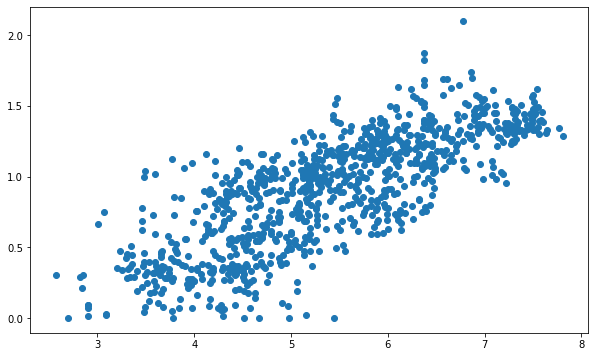

In [250]:
plt.figure(figsize=(10,6))

plt.scatter(combined['Happiness Score'], combined['GDP per capita'])


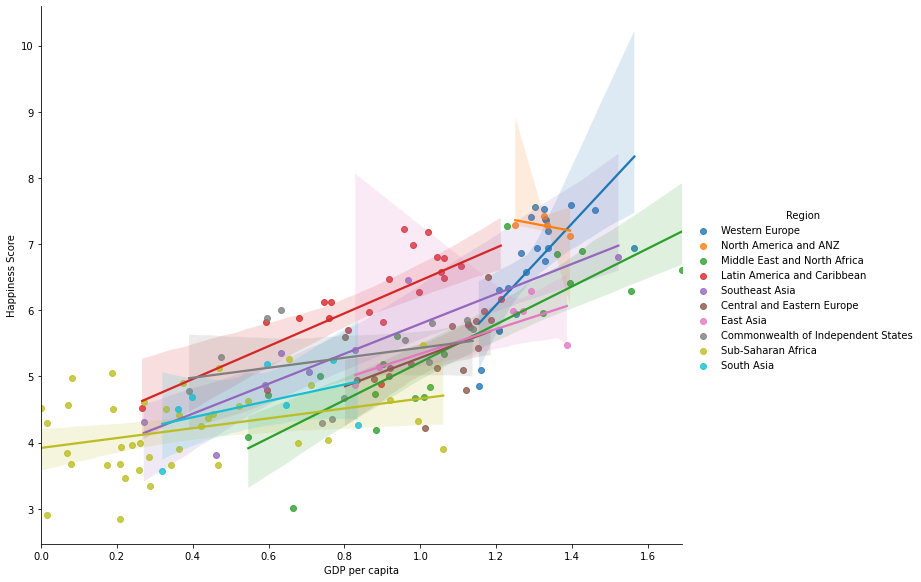

In [255]:
sns.lmplot(x='GDP per capita', y='Happiness Score', data=combined.loc[2015], hue='Region', height=8, aspect=1.2)
 